In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sys
import os
sys.path.append(os.path.relpath('/Users/edoardo/AstroCosmoComputational/Students/MaraglianoEdo/'))

## cic smoothing

In [4]:
def cic_interpolator(particles, masses, grid_shape):
    """
    Inputs:
    particles: 2D array of positions (len(masses), 3)
    masses: 1D array of masses
    grid_shape: tuple of 3 integers defining the shape of the grid (nx, ny, nz)

    Returns:
    rho: 3D array of density values with shape grid_shape
    """
    nx, ny, nz = grid_shape
    rho = np.zeros(grid_shape, dtype=np.float64)

    for p, m in zip(particles, masses):
        i, j, k = np.floor(p).astype(int)
        dx, dy, dz = p - [i, j, k]
        tx, ty, tz = 1 - dx, 1 - dy, 1 - dz

        # Ensure indices are within bounds with periodic boundary conditions
        i0, j0, k0 = i % nx, j % ny, k % nz
        i1, j1, k1 = (i + 1) % nx, (j + 1) % ny, (k + 1) % nz

        # Add contributions to the neighboring grid points
        rho[i0, j0, k0] += m * tx * ty * tz
        rho[i1, j0, k0] += m * dx * ty * tz
        rho[i0, j1, k0] += m * tx * dy * tz
        rho[i1, j1, k0] += m * dx * dy * tz
        rho[i0, j0, k1] += m * tx * ty * dz
        rho[i1, j0, k1] += m * dx * ty * dz
        rho[i0, j1, k1] += m * tx * dy * dz
        rho[i1, j1, k1] += m * dx * dy * dz

    return rho


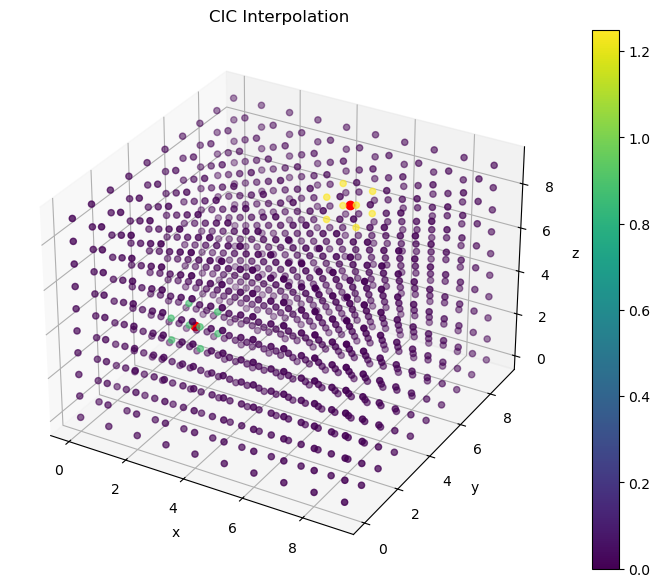

In [5]:
# Example usage:
particles = np.array([[2.5, 2.5, 3.5], [5.5,6.5,7.5]])
masses = np.array([7.0, 10.0])
grid_shape = (10, 10, 10)
rho = cic_interpolator(particles, masses, grid_shape)

# Plotting the result
xs, ys, zs = np.meshgrid(np.arange(0, grid_shape[0], 1), np.arange(0, grid_shape[1], 1), np.arange(0, grid_shape[2], 1), indexing='ij')

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scp = ax.scatter(xs.flatten(), ys.flatten(), zs.flatten(), c=rho.flatten(), cmap='viridis')
ax.plot(particles[:,0], particles[:,1], particles[:,2], color='red', marker='o', linestyle='None')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('CIC Interpolation')
plt.colorbar(scp)
plt.show()

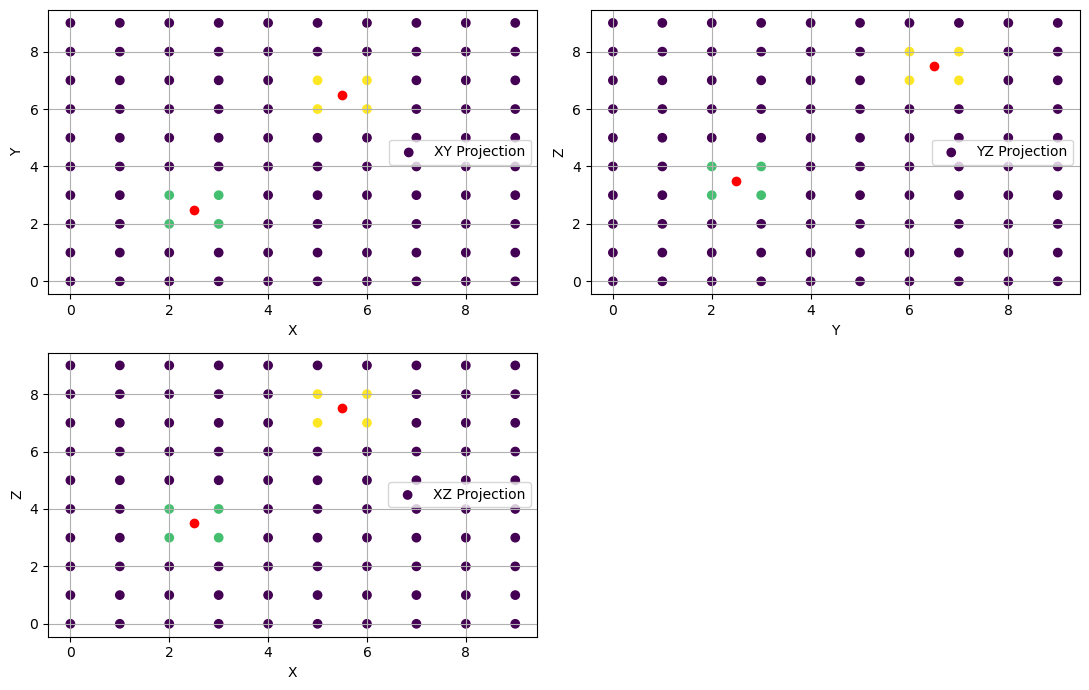

In [6]:
# 2D projection on XY plane
fig = plt.figure(figsize=(11,7))

ax_xy = fig.add_subplot(221)
ax_xy.scatter(xs.mean(axis=2), ys.mean(axis=2), c=rho.mean(axis=2), label='XY Projection')
ax_xy.scatter(particles[:,0], particles[:,1], color='red', marker='o')
ax_xy.set_xlabel('X')
ax_xy.set_ylabel('Y')
ax_xy.legend()
ax_xy.grid(True)

# 2D projection on YZ plane
ax_yz = fig.add_subplot(222)
ax_yz.scatter(ys.mean(axis=0), zs.mean(axis=0), c=rho.mean(axis=0), cmap='viridis', label='YZ Projection')
ax_yz.scatter(particles[:,1], particles[:,2], color='red', marker='o', linestyle='None')
ax_yz.set_xlabel('Y')
ax_yz.set_ylabel('Z')
ax_yz.legend()
ax_yz.grid(True)

# 2D projection on XZ plane
ax_xz = fig.add_subplot(223)
ax_xz.scatter(xs.mean(axis=1), zs.mean(axis=1), c=rho.mean(axis=1), cmap='viridis', label='XZ Projection')
ax_xz.scatter(particles[:,0], particles[:,2], color='red', marker='o', linestyle='None')
ax_xz.set_xlabel('X')
ax_xz.set_ylabel('Z')
ax_xz.legend()
ax_xz.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

## test pyACC smoothing module

In [7]:
import pyACC.clustering.smoothing as sm

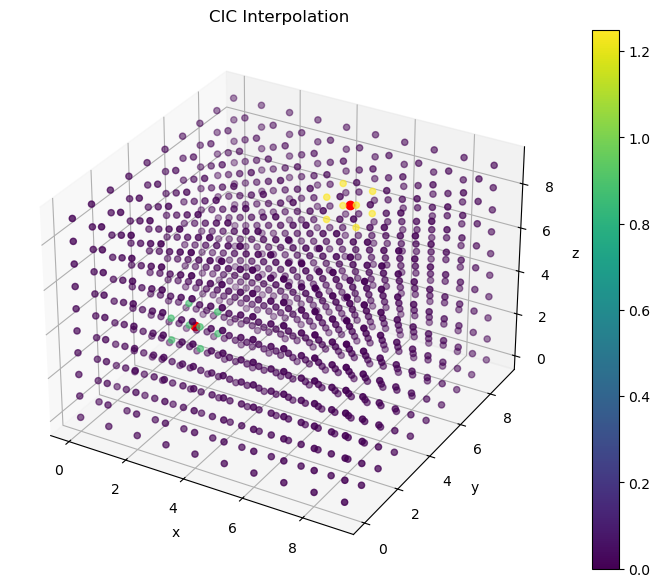

In [9]:
# Example usage:
particles = np.array([[2.5, 2.5, 3.5], [5.5,6.5,7.5]])
masses = np.array([7.0, 10.0])
grid_shape = (10, 10, 10)
rho = sm.cic_interpolator(particles, masses, grid_shape)

# Plotting the result
xs, ys, zs = np.meshgrid(np.arange(0, grid_shape[0], 1), np.arange(0, grid_shape[1], 1), np.arange(0, grid_shape[2], 1), indexing='ij')

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scp = ax.scatter(xs.flatten(), ys.flatten(), zs.flatten(), c=rho.flatten(), cmap='viridis')
ax.plot(particles[:,0], particles[:,1], particles[:,2], color='red', marker='o', linestyle='None')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('CIC Interpolation')
plt.colorbar(scp)
plt.show()

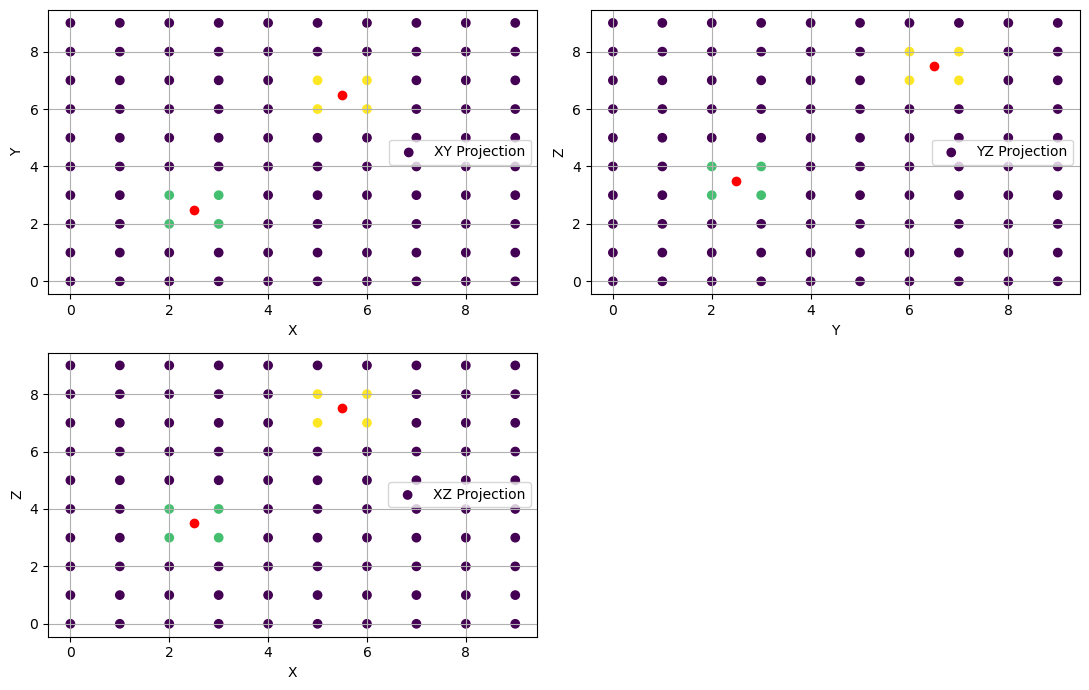

In [10]:
# 2D projection on XY plane
fig = plt.figure(figsize=(11,7))

ax_xy = fig.add_subplot(221)
ax_xy.scatter(xs.mean(axis=2), ys.mean(axis=2), c=rho.mean(axis=2), label='XY Projection')
ax_xy.scatter(particles[:,0], particles[:,1], color='red', marker='o')
ax_xy.set_xlabel('X')
ax_xy.set_ylabel('Y')
ax_xy.legend()
ax_xy.grid(True)

# 2D projection on YZ plane
ax_yz = fig.add_subplot(222)
ax_yz.scatter(ys.mean(axis=0), zs.mean(axis=0), c=rho.mean(axis=0), cmap='viridis', label='YZ Projection')
ax_yz.scatter(particles[:,1], particles[:,2], color='red', marker='o', linestyle='None')
ax_yz.set_xlabel('Y')
ax_yz.set_ylabel('Z')
ax_yz.legend()
ax_yz.grid(True)

# 2D projection on XZ plane
ax_xz = fig.add_subplot(223)
ax_xz.scatter(xs.mean(axis=1), zs.mean(axis=1), c=rho.mean(axis=1), cmap='viridis', label='XZ Projection')
ax_xz.scatter(particles[:,0], particles[:,2], color='red', marker='o', linestyle='None')
ax_xz.set_xlabel('X')
ax_xz.set_ylabel('Z')
ax_xz.legend()
ax_xz.grid(True)

# Show the plot
plt.tight_layout()
plt.show()

# nearest grid point interpolator

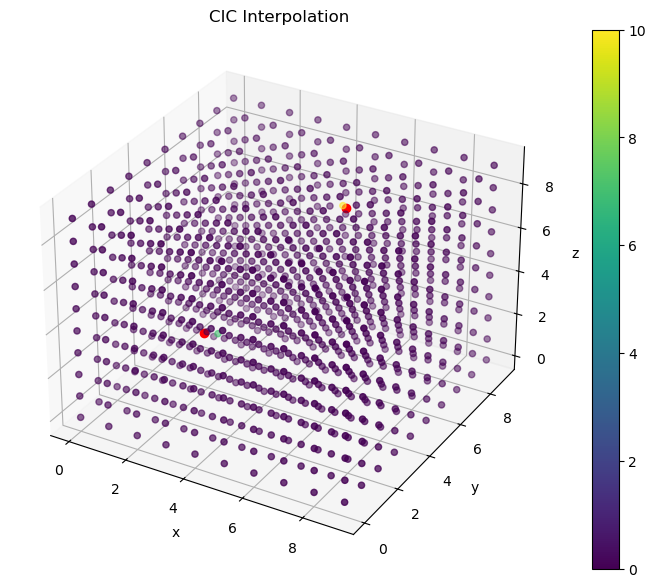

In [13]:
# Example usage:
particles = np.array([[2.7, 2.7, 3.1], [5.2,6.8,7.1]])
masses = np.array([7.0, 10.0])
grid_shape = (10, 10, 10)
rho = sm.nearest_cell_interpolator(particles, masses, grid_shape)

# Plotting the result
xs, ys, zs = np.meshgrid(np.arange(0, grid_shape[0], 1), np.arange(0, grid_shape[1], 1), np.arange(0, grid_shape[2], 1), indexing='ij')

fig = plt.figure(figsize=(11, 7))
ax = fig.add_subplot(111, projection='3d')
scp = ax.scatter(xs.flatten(), ys.flatten(), zs.flatten(), c=rho.flatten(), cmap='viridis')
ax.plot(particles[:,0], particles[:,1], particles[:,2], color='red', marker='o', linestyle='None')
ax.set_xlabel('x')
ax.set_ylabel('y')
ax.set_zlabel('z')
plt.title('CIC Interpolation')
plt.colorbar(scp)
plt.show()

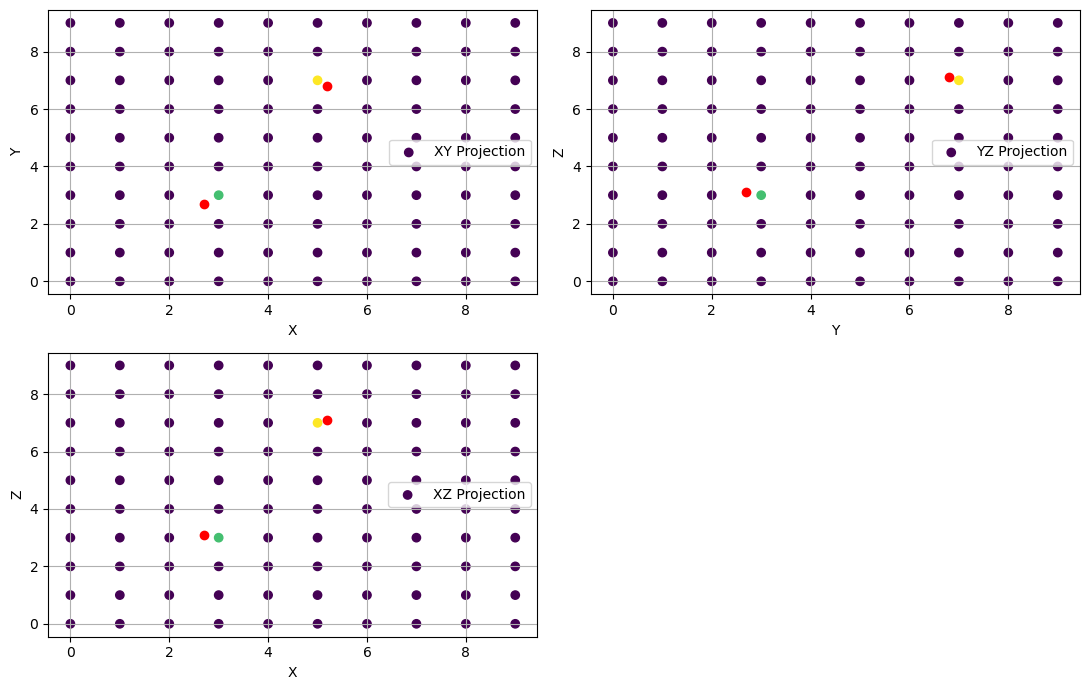

In [14]:
# 2D projection on XY plane
fig = plt.figure(figsize=(11,7))

ax_xy = fig.add_subplot(221)
ax_xy.scatter(xs.mean(axis=2), ys.mean(axis=2), c=rho.mean(axis=2), label='XY Projection')
ax_xy.scatter(particles[:,0], particles[:,1], color='red', marker='o')
ax_xy.set_xlabel('X')
ax_xy.set_ylabel('Y')
ax_xy.legend()
ax_xy.grid(True)

# 2D projection on YZ plane
ax_yz = fig.add_subplot(222)
ax_yz.scatter(ys.mean(axis=0), zs.mean(axis=0), c=rho.mean(axis=0), cmap='viridis', label='YZ Projection')
ax_yz.scatter(particles[:,1], particles[:,2], color='red', marker='o', linestyle='None')
ax_yz.set_xlabel('Y')
ax_yz.set_ylabel('Z')
ax_yz.legend()
ax_yz.grid(True)

# 2D projection on XZ plane
ax_xz = fig.add_subplot(223)
ax_xz.scatter(xs.mean(axis=1), zs.mean(axis=1), c=rho.mean(axis=1), cmap='viridis', label='XZ Projection')
ax_xz.scatter(particles[:,0], particles[:,2], color='red', marker='o', linestyle='None')
ax_xz.set_xlabel('X')
ax_xz.set_ylabel('Z')
ax_xz.legend()
ax_xz.grid(True)

# Show the plot
plt.tight_layout()
plt.show()